TASK 1
 Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries
 into two features and plot a scatter plot to visualize different class of activities

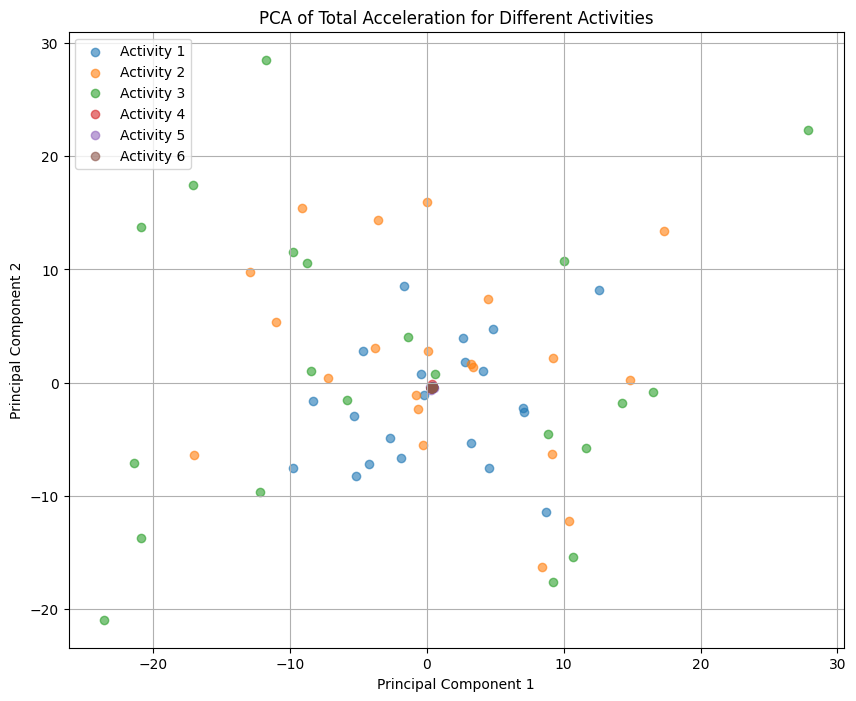

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import CombineScript
import MakeDataset
from MakeDataset import *
# X_train shape (126, 500, 3)
# y_train contains the labels for each sample

# Compute the total acceleration (sqrt(acc_x^2 + acc_y^2 + acc_z^2))
total_acc = np.sqrt(np.sum(X_train**2, axis=2))


# Standardize the data before applying PCA
scaler = StandardScaler()
total_acc_scaled = scaler.fit_transform(total_acc)

# Apply PCA to reduce the data to two components
pca = PCA(n_components=2)
total_acc_pca = pca.fit_transform(total_acc_scaled)

# Plotting the PCA results
plt.figure(figsize=(10, 8))

# Scatter plot with different colors for each activity
unique_labels = np.unique(y_train)
for label in unique_labels:
    plt.scatter(total_acc_pca[y_train == label, 0], 
                total_acc_pca[y_train == label, 1], 
                label=f'Activity {label}', alpha=0.6)

plt.title('PCA of Total Acceleration for Different Activities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import tsfel
import MakeDataset

# Load data

x_train_sig = MakeDataset.X_train
x_test_sig = MakeDataset.X_test
y_train_sig = MakeDataset.y_train
y_test_sig = MakeDataset.y_test
activity_labels = np.array(pd.read_csv('UCI HAR Dataset/activity_labels.txt', header=None, delimiter=' '))[:, 1]

# Dataset sampling frequency
fs = 50

# Feature Extraction using TSFEL
cfg_file = tsfel.get_features_by_domain()  # All features
X_train = tsfel.time_series_features_extractor(cfg_file, x_train_sig, fs=fs)
X_test = tsfel.time_series_features_extractor(cfg_file, x_test_sig, fs=fs)

# Convert numpy arrays to DataFrames
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)



*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [9]:
# # Add the activity column to the DataFrames
X_train_df['activity'] = y_train_sig
X_test_df['activity'] = y_test_sig

# Save the features with activity labels to CSV files
X_train_df.to_csv('features_train.csv', index=False)
X_test_df.to_csv('features_test.csv', index=False)

print(X_train_df.shape, X_test_df.shape)
print(len(x_train_sig), len(x_test_sig))
print(y_train_sig.shape, y_test_sig.shape)

(126, 1153) (54, 1153)
126 54
(126,) (54,)


In [10]:
# Remove low variance features
selector = VarianceThreshold()
X_train_df = selector.fit_transform(X_train_df)
X_test_df = selector.transform(X_test_df)
print(X_train_df.shape, X_test_df.shape)


(126, 1112) (54, 1112)


In [11]:

# Normalize Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train_df)
nX_test = scaler.transform(X_test_df)
print(nX_train.shape, nX_test.shape)

(126, 1112) (54, 1112)


In [12]:

# PCA to reduce to two components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(nX_train)
print(X_train_pca.shape)
X_test_pca = pca.transform(nX_test)
print(X_test_pca.shape)

(126, 2)
(54, 2)


In [13]:

# Convert to DataFrame for easier plotting
pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
pca_df.shape

(126, 2)

In [14]:
y_train_sig.shape

(126,)

(126, 2) (126,)


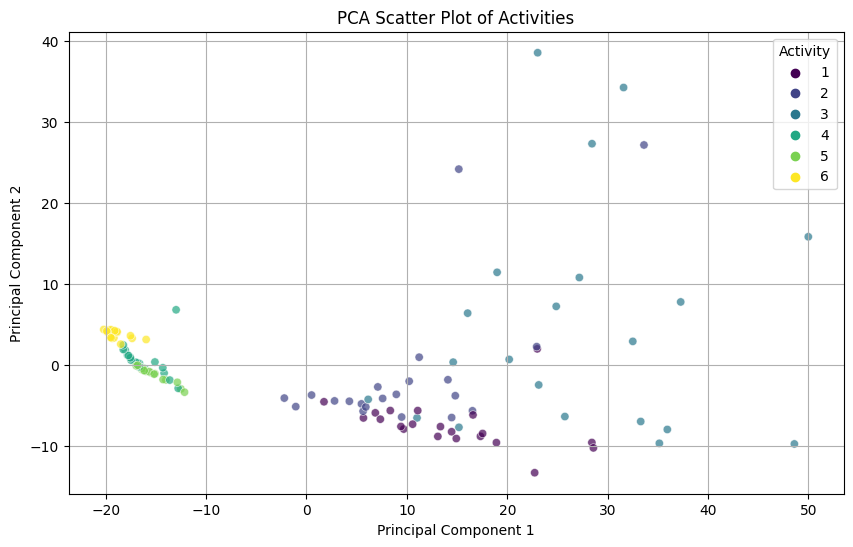

In [15]:
pca_df['Activity'] = y_train_sig

print(X_train_pca.shape, y_train_sig.shape)
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Activity', palette='viridis', data=pca_df, legend='full', alpha=0.7)
plt.title('PCA Scatter Plot of Activities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend(title='Activity', loc='upper right', labels=activity_labels)
plt.grid(True)
plt.show()

In [16]:
print(X_train_pca.shape, y_train_sig.shape)

(126, 2) (126,)


In [17]:
pca_df

,PC1,PC2,Activity
0,4.272500,-4.450216,2
1,-19.482139,3.725631,6
2,-16.712509,-0.177603,5
3,5.476870,-4.775690,2
4,15.174376,24.213993,2
...,...,...,...
121,9.409897,-7.565166,1
122,-15.096288,0.398268,4
123,-19.460747,3.391401,6
124,14.089202,-1.795708,2


In [18]:
# pca_df.to_csv('features_train.csv')

In [19]:
# pca_df_test = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
# pca_df_test['Activity'] = y_test_sig

# pca_df_test.shape

In [20]:
# pca_df_test.to_csv('features_test.csv')
# pca_df_test

Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

C:\Users\prave\AppData\Local\Temp\ipykernel_24468\862390193.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_data = pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\HAR\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header=None, engine='python')


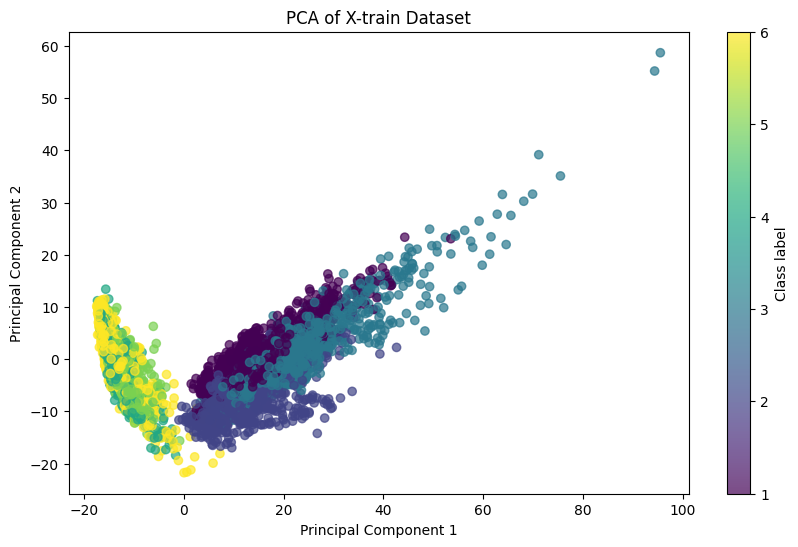

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the Data
# Read X-train.txt with space delimiter
X_data = pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\HAR\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header=None, engine='python')

# Read y_train.txt for labels
y_data = pd.read_csv(r'C:\Users\prave\OneDrive\Desktop\HAR\UCI HAR Dataset\train\y_train.txt', header=None)

# Convert y_data to a NumPy array and flatten it
y = y_data.values.flatten()

# Ensure the dataset has the correct number of columns
expected_columns = 561
if X_data.shape[1] != expected_columns:
    raise ValueError(f"Expected {expected_columns} columns in X-train.txt, but got {X_data.shape[1]} columns")

# Check the length of y_data matches the number of rows in X_data
if len(y) != X_data.shape[0]:
    raise ValueError(f"The number of labels in y_train.txt does not match the number of rows in X-train.txt")

# Convert X_data to a NumPy array
X = X_data.values

# Step 2: Preprocess the Data
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize the Data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Class label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of X-train Dataset')
plt.show()